# Logistic Regression in Machine Learning
Logistic regression is one of the most popular Machine Learning algorithms, which comes under the **Supervised Learning technique**. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, **it gives the probabilistic values which lie between 0 and 1.**

Logistic Regression is much similar to the Linear Regression except that how they are used. **Linear Regression is used for solving Regression problems**, whereas **Logistic regression is used for solving the classification problems.**

## Type of Logistic Regression:
On the basis of the categories, Logistic Regression can be classified into three types:

- **Binomial:** In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.
- **Multinomial:** In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
- **Ordinal:** In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

## Steps to implement Logistic Regression:
- Data Pre-processing step
- Fitting Logistic Regression to the Training set
- Predicting the test result
- Test accuracy of the result(Creation of Confusion matrix)
- Visualizing the test set result.

### 1. Data Pre-Processing Step:

In [10]:
# importing libraries  
import numpy as nm 
import matplotlib.pyplot as mtp  
import pandas as pd  

In [11]:
#importing datasets  
data_set= pd.read_csv('user_data.csv')  
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values   

In the above code, we have taken [2, 3] for x because our independent variables are age and salary, which are at index 2, 3. And we have taken 4 for y variable because our dependent variable is at index 4. 

In [13]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

### 2. Fitting Logistic Regression to the Training set:

We have well prepared our dataset, and now we will train the dataset using the training set. For providing training or fitting the model to the training set, we will import the LogisticRegression class of the sklearn library.

After importing the class, we will create a classifier object and use it to fit the model to the logistic regression.

In [14]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

### 3. Predicting the test result
Now we will predict the test set result by creating a new prediction vector y_pred. Below is the code for it:

In [15]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

### 4. Test accuracy of the result using Confusion matrix

In the above output, we have seen that there were some incorrect predictions, so if we want to know the number of correct and incorrect predictions, we need to use the confusion matrix. Below is the code for it:

In [16]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

We can see that the confusion matrix has **8+3= 11 incorrect predictions** and **65+24=89 correct predictions.** Therefore, we can say that **the classification models is quite good for prediction.**

**5. Visualizing the training set result:**
Finally, we will visualize the training set result. To visualize the result, we will use ListedColormap class of matplotlib library.

Here we will visualize the training set result. To visualize the training set result we will plot a graph for the Logistic regression classifier. The classifier will predict yes or No for the users who have either Purchased or Not purchased the SUV car as we did in Logistic Regression.
Below is the code for it:

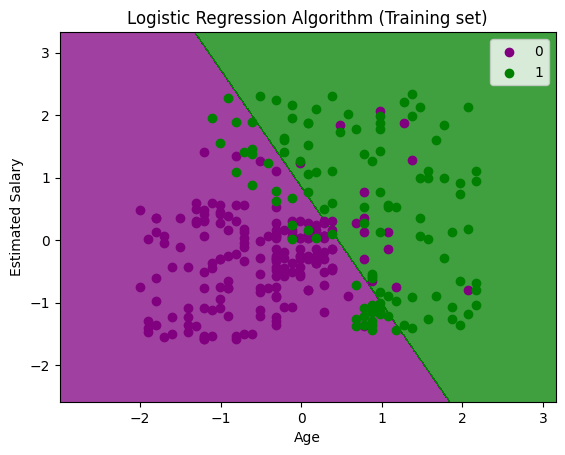

In [17]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, 
                               step  =0.01), nm.arange(start = x_set[:, 1].min() - 1, 
                               stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('purple','green' )))

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):  
	mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1]
                , c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Logistic Regression Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()

The above output is completely different from the rest classification models. It has both vertical and horizontal lines that are splitting the dataset according to the age and estimated salary variable.

As we can see, the tree is trying to capture each dataset, which is the case of overfitting.

### 6. Visualizing the test set result:

Our model is well trained using the training dataset. Now, we will visualize the result for new observations (Test set).

Visualization of test set result will be similar to the visualization of the training set except that the training set will be replaced with the test set.

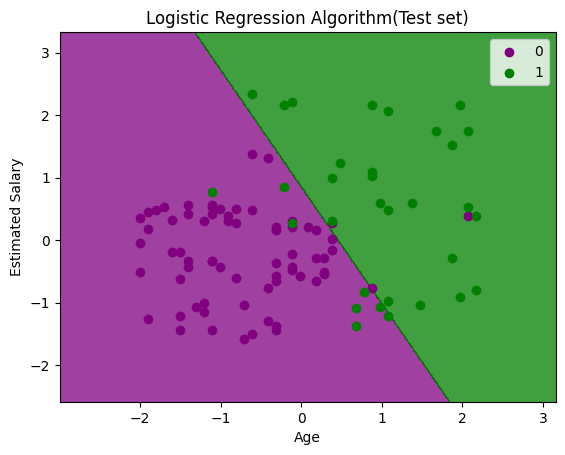

In [18]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(),  x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('purple','green' )))  

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  

for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
            c = ListedColormap(('purple', 'green'))(i), label = j)
    
mtp.title('Logistic Regression Algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show() 

The above graph shows the test set result. As we can see, the graph is divided into two regions (Purple and Green). And Green observations are in the green region, and Purple observations are in the purple region. So we can say it is a good prediction and model. Some of the green and purple data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (11 Incorrect output).

Therefore, the model is pretty good and ready to make new predictions for this classification problem.